### Utilizing NetCDF4 python library  

---

Sentinel dataset files on Copernicus Hub are in the form of .nc files (Net Common Data Form). To access these files programatically, the netCDF4 library will be used.

The library is already installed if Anaconda is used to install python. Otherwise, pip can be used to install with the command:


|**pip install netCDF4**|
------------------------

---



Resources used for this research:|
- [Install python with pip](https://pypi.org/project/netCDF4/)
- [How to read netCDF4 files in Python](https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/)
- [Visualize Sentinel 5P data with Python](https://github.com/acgeospatial/Sentinel-5P/blob/master/Sentinel_5P.ipynb)

---

In [ ]:
import netCDF4 as nc # Import the netCDF4 library (I gave it the alias nc to simplify the naming during usage)

# Set the url to the nc file that is downloaded 
nc_file = "Download Results\S5P_OFFL_L2__CH4____20230514T034638_20230514T052808_28925_03_020500_20230515T195331.nc"

# Open the file as a Dataset object
dataset = nc.Dataset(nc_file, 'r')

print(dataset)

---
There is a lot of data but not the data that we require. 

To access the required data, we will need to access the groups attribute within the data and retrieve it.

---

In [ ]:
# Check what groups are in the data 
print(dataset.groups)
print('\n')
print(dataset.groups['PRODUCT'])
print('\n')
print(dataset.groups['PRODUCT'].dimensions)
print('\n')
print(dataset.groups['PRODUCT'].variables['time'])
print('\n')
print('\n')
print('\n')
print('\n')


---
In the groups attribute, there are 2 groups, PRODUCT and METADATA.

We are interested in the PRODUCT group so we need to inspect the variables in these groups.

The variables store the data on certain aspects of the data and can be accessed by using their respective keys as this group is in the form of a dictionary.

---

In [ ]:
# Display the variables within the product group
print(dataset.groups['PRODUCT'].variables)

# Retrieve the keys for each variable within the product group
dataset.groups['PRODUCT'].variables.keys()

---
As shown above, there multiple variables but the ones we are interested in are:
- latitude
- longitude
- methane_mixing_ratio_bias_corrected
---

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(time, scanline, ground_pixel)
    long_name: pixel center longitude
    units: degrees_east
    standard_name: longitude
    valid_min: -180.0
    valid_max: 180.0
    bounds: /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/longitude_bounds
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 4173, 215)
filling on


<class 'netCDF4._netCDF4.Variable'>
float32 latitude(time, scanline, ground_pixel)
    long_name: pixel center latitude
    units: degrees_north
    standard_name: latitude
    valid_min: -90.0
    valid_max: 90.0
    bounds: /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 4173, 215)
filling on


<class 'netCDF4._netCDF4.Variable'>
float32 methane_mixing_ratio_bias_corrected(time, scanline, ground_pixel)
    units: 1e-9
    standard_name: dry_atmosphere_mole_fraction_of_methane
    long_name: corrected column-av

C:\Users\zach0\AppData\Local\Temp\ipykernel_13892\3020217148.py:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(lon[0, :, :], lat[0, :, :], ch4[0, :, :], cmap="hot", shading="auto")


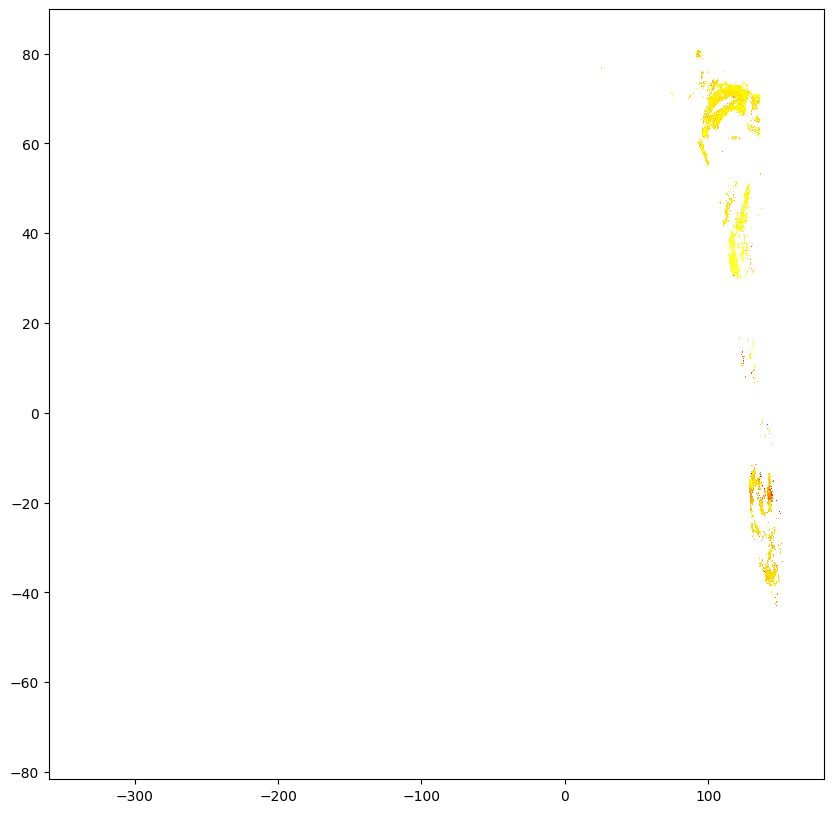

In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt

lon = dataset.groups['PRODUCT'].variables['longitude']
lat = dataset.groups['PRODUCT'].variables['latitude']
ch4 = dataset.groups['PRODUCT'].variables['methane_mixing_ratio_bias_corrected']

print(lon)
print("\n")
print(lat)
print("\n")
print(ch4)
print("\n")

fig, ax = plt.subplots(figsize=(10,10))
ax.pcolormesh(lon[0, :, :], lat[0, :, :], ch4[0, :, :], cmap="hot", shading="auto")

Dataset has 3 dimensions as according to the output:

**E.g. Longitude data**


|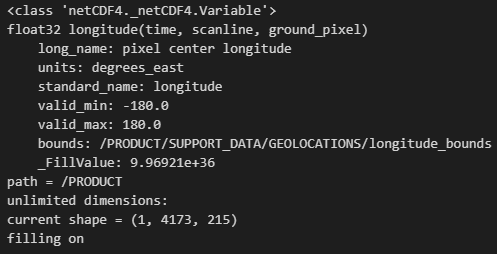
---

**(time, scanline, ground_pixel)** is the type of dimensions the data has. 

**Current Shape** displays the size of said dimensions. 

Therefore the size can be seen as:
- time (1)
- scanline (4173)
- ground_pixel (215)

In [ ]:
nc_file = "Download Results/S5P_OFFL_L2__CH4____20230514T034638_20230514T052808_28925_03_020500_20230515T195331.nc"
file_header = nc4.Dataset(nc_file, mode='r') # Create a file header containing the nc_file's metadata in read mode
file_header.groups["PRODUCT"]

lons = file_header.groups['PRODUCT'].variables['longitude']
lats = file_header.groups['PRODUCT'].variables['latitude'][:][0, :, :]
ch4 = file_header.groups['PRODUCT'].variables['methane_mixing_ratio'][0, :, :]
ch4_units = file_header.groups['PRODUCT'].variables['methane_mixing_ratio'].units

print(lons[:][0, :, :].shape)
print(lons[0, :, :].shape)
print(lons[:, :, :].shape)